In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('in_vivo_ephys_openephys')

os.chdir('../')

In [3]:
pos_data = pd.read_pickle('position_data.pkl')
fr_data = pd.read_pickle('spatial_firing.pkl')
len(pos_data)/50

34869.94

In [4]:
fr_data

,session_id,cluster_id,tetrode,primary_channel,firing_times,firing_times_opto,recording_length_sampling_points,number_of_spikes,mean_firing_rate,recording_length_seconds,...,probe_trial_number,beaconed_firing_rate_map,non_beaconed_firing_rate_map,probe_firing_rate_map,beaconed_firing_rate_map_sem,non_beaconed_firing_rate_map_sem,probe_firing_rate_map_sem,ThetaPower,ThetaIndex,Boccara_theta_class
4,M3_D18_2020-11-21_14-29-49,5,1,4,"[645928.0, 1351321.0, 1943206.0, 2550762.0, 31...",[],52304896.0,103,0.059077,1743.4965,...,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],0.032807,0.021900,0
6,M3_D18_2020-11-21_14-29-49,7,2,2,"[12650.0, 27269.0, 61818.0, 65227.0, 66200.0, ...",[],52304896.0,6073,3.483230,1743.4965,...,[],"[6.5897858319604845, 2.394497010506767, 3.0358...","[0.0, 0.9415013808686923, 1.385553297616798, 4...",[],"[2.935760792727953, 0.6181390635442938, 0.8550...","[0.0, 0.7892821977047746, 0.44308596952152535,...",[],1.665959,0.017063,0
10,M3_D18_2020-11-21_14-29-49,12,2,3,"[3619.0, 7330.0, 9174.0, 18824.0, 24775.0, 384...",[],52304896.0,33320,19.111022,1743.4965,...,[],"[16.474464579901213, 21.115110001741492, 17.20...","[41.21586810922223, 24.949786593020345, 24.247...",[],"[2.809693205284718, 2.1556791146025662, 2.3567...","[20.560706134330456, 3.7002521237091432, 3.418...",[],5.997624,0.007225,0
11,M3_D18_2020-11-21_14-29-49,13,2,3,"[17817.0, 19191.0, 26186.0, 29574.0, 32090.0, ...",[],52304896.0,8461,4.852892,1743.4965,...,[],"[0.0, 0.2176815464097061, 0.6746348538853092, ...","[0.0, 0.0, 0.0, 0.580147357428788, 1.309328968...",[],"[0.0, 0.3467286155126386, 0.5553639433632767, ...","[0.0, 0.0, 0.0, 0.7905138339920547, 0.93757318...",[],1.324618,0.011598,0
12,M3_D18_2020-11-21_14-29-49,14,2,3,"[5127.0, 13860.0, 18690.0, 47291.0, 65617.0, 6...",[],52304896.0,8461,4.852892,1743.4965,...,[],"[3.2948929159802423, 3.2652231961455915, 3.373...","[0.0, 3.766005523474769, 7.620543136892388, 5....",[],"[1.190476190476196, 0.9372133024592326, 1.1997...","[0.0, 1.2559554108660225, 2.7679637328260442, ...",[],2.446640,0.103395,0
13,M3_D18_2020-11-21_14-29-49,16,2,4,"[427.0, 1738.0, 3136.0, 7668.0, 8312.0, 8525.0...",[],52304896.0,16455,9.437931,1743.4965,...,[],"[6.5897858319604845, 11.972485052533836, 9.782...","[10.303967027305557, 7.532011046949538, 4.8494...",[],"[2.4402233988851796, 1.703288092574061, 2.0901...","[4.293659403604641, 1.6602798292504333, 1.9241...",[],6.149038,0.159423,1
14,M3_D18_2020-11-21_14-29-49,17,2,4,"[378.0, 914.0, 2177.0, 7608.0, 8253.0, 9006.0,...",[],52304896.0,25136,14.417006,1743.4965,...,[],"[13.179571663920969, 13.060892784582366, 13.49...","[15.455950540958336, 12.710268641727346, 15.24...",[],"[2.637379779275643, 1.7220773451800553, 2.5002...","[28.531971210855286, 3.8097235519750132, 4.105...",[],8.074819,0.029236,0
17,M3_D18_2020-11-21_14-29-49,20,3,1,"[33911.0, 38883.0, 42242.0, 43517.0, 44025.0, ...",[],52304896.0,7553,4.332099,1743.4965,...,[],"[6.5897858319604845, 4.353630928194122, 1.6865...","[5.1519835136527785, 6.1197589756465, 6.234989...",[],"[4.350923849696349, 0.8407592190770009, 0.6179...","[3.6062026685899884, 1.5690016599415615, 1.814...",[],2.135871,0.075649,0
18,M3_D18_2020-11-21_14-29-49,22,3,1,"[2156.0, 5672.0, 6714.0, 7271.0, 8567.0, 9070....",[],52304896.0,34655,19.876725,1743.4965,...,[],"[26.359143327841938, 17.196842166366782, 21.25...","[15.455950540958336, 18.3592769269395, 22.1688...",[],"[6.120713655012394, 2.011289271124405, 3.00637...","[3.4000009242253264, 3.3407745221919516, 4.525...",[],10.699535,0.040383,0
19,M3_D18_2020-11-21_14-29-49,23,3,2,"[855.0, 999.0, 3091.0, 3170.0, 3377.0, 3586.0,...",[],52304896.0,74800,42.902294,1743.4965,...,[],"[46.12850082372339, 42.6655830963024, 36.76759...","[30.91190108191667, 38.13080592518204, 35.3316...",[],"[10.088455888318848, 3.3965091551265147, 3

In [5]:
assert pos_data.index.start==0
bin_size=50
w=4
f = np.linspace(-5*w,5*w,10*w-1)
K = 1/(np.sqrt(2*np.pi) * w )*np.exp(-f**2/(2*w**2))
data4copula = [[] for i in range(len(fr_data))]
for cluster in range(len(fr_data)):
    when, count = np.unique((fr_data.iloc[cluster].firing_times.astype("int")//(pos_data.index.step*bin_size)),return_counts=True)
    spikes = np.zeros(len(pos_data.speed_per200ms[::bin_size])).astype("int")
    spikes[when] = count
    rate = np.zeros(len(pos_data.speed_per200ms[::bin_size])).astype("float")
    rate = np.convolve(spikes,K,mode="same")
#     pos_data["spikes_per200ms"] = spikes
    data4copula[cluster] = [rate,
                            np.array(pos_data.speed_per200ms[::bin_size]),
                            np.array(pos_data.x_position_cm[::bin_size]),
#                              [],
                            np.array(pos_data.trial_number[::bin_size]),
                            np.array(pos_data.trial_type[::bin_size])]
# fr_data["spikes_per200ms"]=data4copula
    

In [6]:
new_data=pd.DataFrame({"session_id": fr_data.session_id, 
                       'cluster_id': fr_data.cluster_id, 
                       "spikes_per50ms": data4copula})

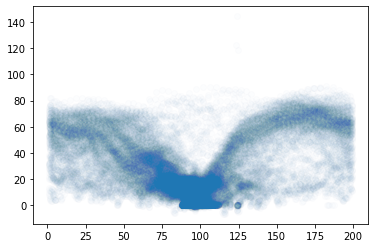

In [9]:
plt.scatter(new_data.iloc[0].spikes_per50ms[2],new_data.iloc[0].spikes_per50ms[1],alpha=0.01)

In [10]:
pos_data

,x_position_cm,time_seconds,speed_per200ms,trial_number,trial_type
0,183.00,0.000,0.000000,1,1
30,182.75,0.001,0.000000,1,1
60,182.75,0.002,0.000000,1,1
90,183.00,0.003,0.000000,1,1
120,182.75,0.004,0.000000,1,1
...,...,...,...,...,...
52304760,0.00,1743.492,0.006615,227,0
52304790,0.00,1743.493,0.000417,227,0
52304820,0.00,1743.494,0.000000,227,0
52304850,0.00,1743.495,0.000000,227,0


In [11]:
session=new_data.iloc[0].session_id
new_data.to_pickle(f"{session}_50ms.pkl",)

In [12]:
session

'M3_D18_2020-11-21_14-29-49'